<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

In [3]:
data.groupby("sex").count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary
sex,,,,,,,,,,,,,,
Female,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771
Male,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790


**2. Каков средний возраст (признак age) женщин?**

In [6]:
data[data.sex == "Female"].age.mean()

36.85823043357163

**3. Какова доля граждан Германии (признак native-country)?**

In [14]:
1.0*data[data["native-country"] == "Germany"].age.count()/data.shape[0] * 100

0.42074874850281013

**4. Постройте гистограмму распределения (bar plot) образования людей (признак education).**

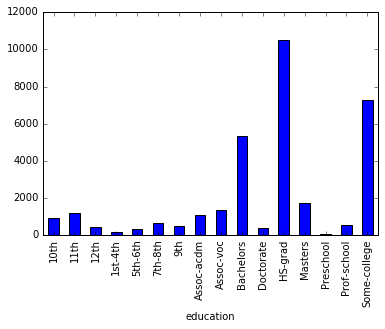

In [29]:
data.groupby("education").count().age.plot(kind="bar")

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? **

In [30]:
#data[data.salary == ">50K"].describe().age
data[data.salary == "<=50K"].describe().age

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [39]:
data.groupby(["salary","education"]).count().age.reset_index()

,salary,education,age
0,<=50K,10th,871
1,<=50K,11th,1115
2,<=50K,12th,400
3,<=50K,1st-4th,162
4,<=50K,5th-6th,317
5,<=50K,7th-8th,606
6,<=50K,9th,487
7,<=50K,Assoc-acdm,802
8,<=50K,Assoc-voc,1021
9,<=50K,Bachelors,3134


In [34]:
data[data.salary == "<=50K"].groupby("education").count().age

education
10th             871
11th            1115
12th             400
1st-4th          162
5th-6th          317
7th-8th          606
9th              487
Assoc-acdm       802
Assoc-voc       1021
Bachelors       3134
Doctorate        107
HS-grad         8826
Masters          764
Preschool         51
Prof-school      153
Some-college    5904
Name: age, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [40]:
data.groupby(["race", "sex"]).describe()

age  capital-gain  capital-loss  \
race               sex                                                      
Amer-Indian-Eskimo Female count    119.000000    119.000000    119.000000   
                          mean      37.117647    544.605042     14.462185   
                          std       13.114991   2451.591587    157.763811   
                          min       17.000000      0.000000      0.000000   
                          25%       27.000000      0.000000      0.000000   
                          50%       36.000000      0.000000      0.000000   
                          75%       46.000000      0.000000      0.000000   
                          max       80.000000  15024.000000   1721.000000   
                   Male   count    192.000000    192.000000    192.000000   
                          mean      37.208333    675.260417     46.395833   
                          std       12.049563   2929.745443    286.562584   
                          min       17.000000      0.000000      0.000000   
                          25%       28.000000      0.000000      0.000000   
                          50%       35.000000      0.000000      0.000000   
                          75%       45.000000      0.000000      0.000000   
                          max       82.000000  27828.000000   1980.000000   
Asian-Pac-Islander Female count    346.000000    346.000000    346.000000   
                          mean      35.089595    778.436416     50.852601   
                          std       12.300845   7675.228631    296.529225   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       33.000000      0.000000      0.000000   
                          75%       43.750000      0.000000      0.000000   
                          max       75.000000  99999.000000   2258.000000   
                   Male   count    693.000000    693.000000    693.000000   
                          mean      39.073593   1827.813853    120.373737   
                          std       12.883944  10947.525528    472.917697   
                          min       18.000000      0.000000      0.000000   
                          25%       29.000000      0.000000      0.000000   
                          50%       37.000000      0.000000      0.000000   
...                                       ...           ...           ...   
Other              Female std       11.631599   1317.326460    231.796929   
                          min       17.000000      0.000000      0.000000   
                          25%       23.000000      0.000000      0.000000   
                          50%       29.000000      0.000000      0.000000   
                          75%       39.000000      0.000000      0.000000   
                          max       74.000000   7688.000000   1740.000000   
                   Male   count    162.000000    162.000000    162.000000   
                          mean      34.654321   1392.185185     77.746914   
                          std       11.355531  11093.711595    370.986720   
                          min       17.000000      0.000000      0.000000   
                          25%       26.000000      0.000000      0.000000   
                          50%       32.000000      0.000000      0.000000   
                          75%       42.000000      0.000000      0.000000   
                          max       77.000000  99999.000000   2179.000000   
White              Female count   8642.000000   8642.000000   8642.000000   
                          mean      36.811618    573.610391     65.390535   
                          std       14.329093   4763.131649    352.330817   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       35

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)?**

In [43]:
data[data.salary == ">50K"].groupby("marital-status").count().age

marital-status
Divorced                  463
Married-AF-spouse          10
Married-civ-spouse       6692
Married-spouse-absent      34
Never-married             491
Separated                  66
Widowed                    85
Name: age, dtype: int64

**9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [53]:
print data["hours-per-week"].max()

print data[data["hours-per-week"] == data["hours-per-week"].max()].shape[0]

data[data["hours-per-week"] == data["hours-per-week"].max()].groupby("salary").count()

25.0/85

99
85


0.29411764705882354

**10. Посчитайте среднее время работы (hours-per-week) зарабатывающих много и мало (salary) для каждой страны (native-country).**

In [58]:
data.groupby(["salary", "native-country"]).mean()["hours-per-week"]

salary  native-country            
<=50K   ?                             40.164760
        Cambodia                      41.416667
        Canada                        37.914634
        China                         37.381818
        Columbia                      38.684211
        Cuba                          37.985714
        Dominican-Republic            42.338235
        Ecuador                       38.041667
        El-Salvador                   36.030928
        England                       40.483333
        France                        41.058824
        Germany                       39.139785
        Greece                        41.809524
        Guatemala                     39.360656
        Haiti                         36.325000
        Holand-Netherlands            40.000000
        Honduras                      34.333333
        Hong                          39.142857
        Hungary                       31.300000
        India                         38.233333
     